In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras
import os

In [80]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14122465991299916914
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3157314764
locality {
  bus_id: 1
  links {
  }
}
incarnation: 825755330937689096
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [81]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [82]:
path = "cell_images"

In [83]:
TRAINING_LOGS_FILE = "training_logs_1.csv"
TEST_LOGS_FILE = "test_logs_1.csv"
MODEL_SUMMARY_FILE = "model_summary_1.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model_1.h5"

In [84]:
training_data_dir = path + "/training"
validation_data_dir = path + "/validation"
test_data_dir = path + "/test"

In [85]:
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

In [86]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [87]:
model = Sequential()

In [88]:
model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])


C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  """
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\Aiman\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipyker

In [89]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [90]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 24794 images belonging to 2 classes.
Found 1273 images belonging to 2 classes.
Found 1491 images belonging to 2 classes.


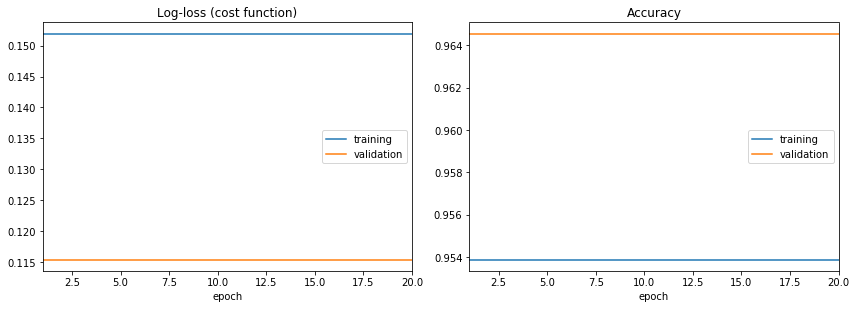

In [91]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

In [27]:
import pandas as pd

In [92]:
history = pd.read_csv('training_logs_1.csv')

In [98]:
history

,epoch;acc;loss;val_acc;val_loss
0,0;0.7848029715762274;0.4206898616210531;0.9479...
1,1;0.9496001938502225;0.16315401059226875;0.952...
2,2;0.9550520959534771;0.14890623046585463;0.951...
3,3;0.9573943946080585;0.13971883127150364;0.956...
4,4;0.9582424682981988;0.13571940950749042;0.954...
5,5;0.9592520798045073;0.13195784045275766;0.961...
6,6;0.9585655439834913;0.13127125531143755;0.958...
7,7;0.9592520797996931;0.13180945964430668;0.961...
8,8;0.9593328486909274;0.13122259533968084;0.954...
9,9;0.9584847750296722;0.13082215162191932;0.962...


In [99]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[0.13918823104511754, 0.9664654594232059]

In [78]:
model.metrics_names

['loss', 'acc']